# **1. Perkenalan Dataset**


Dataset [Heart Disease](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) merupakan salah satu himpunan data medis multivariat yang paling banyak digunakan dalam penelitian machine learning untuk prediksi penyakit jantung koroner. Dataset ini terdiri atas 14 atribut utama yang merepresentasikan karakteristik klinis pasien, mencakup faktor demografis, indikator fungsional jantung, hasil pemeriksaan laboratorium, serta parameter elektrokardiografi. Contoh atribut tersebut antara lain usia, jenis kelamin, jenis nyeri dada, tekanan darah saat istirahat, kolesterol, kadar gula darah puasa, hasil EKG, denyut jantung maksimum, angina akibat latihan, oldpeak, slope, jumlah pembuluh utama, dan status Thalassemia.

Walaupun basis data lengkapnya memiliki 76 atribut, seluruh penelitian terpublikasi umumnya hanya memanfaatkan subset 14 fitur tersebut karena konsistensi dan kelengkapan datanya. Di antara beberapa sumber dataset penyakit jantung internasional, Cleveland Heart Disease Database merupakan satu-satunya yang dinilai cukup bersih dan reliabel untuk keperluan pemodelan ML, sehingga menjadi standar referensi dalam berbagai studi diagnostik otomatis berbasis data.

Tujuan utama penggunaan dataset ini adalah untuk memprediksi keberadaan penyakit jantung berdasarkan atribut klinis pasien (variabel num), sekaligus untuk eksplorasi lebih lanjut seperti analisis hubungan antar-variabel, identifikasi faktor risiko dominan, dan pengembangan model klasifikasi medis berbasis pembelajaran mesin.

Dataset ini dikembangkan oleh beberapa institusi medis internasional, termasuk:

- Hungarian Institute of Cardiology, Budapest – Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland – William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland – Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach & Cleveland Clinic Foundation – Robert Detrano, M.D., Ph.D.

Dataset ini pertama kali diperkenalkan dalam penelitian diagnosis penyakit jantung berbasis algoritma probabilistik dan sejak itu menjadi benchmark dalam studi-studi terkait pembelajaran mesin di bidang kardiologi.

# **2. Import Library**

In [33]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np
import os
import pickle

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [34]:
# Pengaturan visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Menampilkan semua kolom di pandas
pd.set_option('display.max_columns', None)

In [35]:
# Definisi folder
FOLDERS = {
    'visualizations': 'visualizations',
    'csv_output': 'csv_output',
    'data': 'data'
}

In [36]:
# Membuat folder jika belum ada
for folder_name, folder_path in FOLDERS.items():
    os.makedirs(folder_path, exist_ok=True)
    print(f"✓ Folder '{folder_path}' siap")

✓ Folder 'visualizations' siap
✓ Folder 'csv_output' siap
✓ Folder 'data' siap


# **3. Memuat Dataset**

In [37]:
file_path = 'heart_disease_uci.csv'

# Membaca dataset
df = pd.read_csv(file_path)

print("\n" + "=" * 60)
print("DATASET BERHASIL DIMUAT")
print("=" * 60)


DATASET BERHASIL DIMUAT


In [38]:
print("\n" + "=" * 60)
print("5 BARIS PERTAMA DATASET")
print("=" * 60)
print(df.head())

print("\n" + "=" * 60)
print("INFORMASI DATASET")
print("=" * 60)
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print("\nTipe Data:")
print(df.dtypes)

print("\n" + "=" * 60)
print("STATISTIK DESKRIPTIF")
print("=" * 60)
print(df.describe())


5 BARIS PERTAMA DATASET
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4          

In [39]:
# Hapus 1 kolom
df = df.drop(columns=['dataset'])

In [40]:
# Dictionary pemetaan nama kolom
kolom_indonesia = {
    'id': 'id_pasien',
    'age': 'usia',
    'sex': 'jenis_kelamin',
    'cp': 'tipe_nyeri_dada',
    'trestbps': 'tekanan_darah_istirahat',
    'chol': 'kolesterol',
    'fbs': 'gula_darah_puasa',
    'restecg': 'hasil_ecg_istirahat',
    'thalach': 'detak_jantung_maksimal',
    'exang': 'angina_olahraga',
    'oldpeak': 'depresi_st',
    'slope': 'kemiringan_st',
    'ca': 'jumlah_pembuluh_darah',
    'thal': 'thalassemia',
    'num': 'target'
}

# Mengubah nama kolom
df.rename(columns=kolom_indonesia, inplace=True)

print("\n" + "=" * 60)
print("NAMA KOLOM BERHASIL DIUBAH KE BAHASA INDONESIA")
print("=" * 60)
print("Nama Kolom Baru:")
print(df.columns.tolist())


NAMA KOLOM BERHASIL DIUBAH KE BAHASA INDONESIA
Nama Kolom Baru:
['id_pasien', 'usia', 'jenis_kelamin', 'tipe_nyeri_dada', 'tekanan_darah_istirahat', 'kolesterol', 'gula_darah_puasa', 'hasil_ecg_istirahat', 'thalch', 'angina_olahraga', 'depresi_st', 'kemiringan_st', 'jumlah_pembuluh_darah', 'thalassemia', 'target']


In [41]:
df.head()

,id_pasien,usia,jenis_kelamin,tipe_nyeri_dada,tekanan_darah_istirahat,kolesterol,gula_darah_puasa,hasil_ecg_istirahat,thalch,angina_olahraga,depresi_st,kemiringan_st,jumlah_pembuluh_darah,thalassemia,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **4. Exploratory Data Analysis (EDA)**


In [42]:
print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

# 5.1 Cek Missing Values
print("\n--- CEK MISSING VALUES ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Tidak ada missing values")
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")


EXPLORATORY DATA ANALYSIS (EDA)

--- CEK MISSING VALUES ---
tekanan_darah_istirahat     59
kolesterol                  30
gula_darah_puasa            90
hasil_ecg_istirahat          2
thalch                      55
angina_olahraga             55
depresi_st                  62
kemiringan_st              309
jumlah_pembuluh_darah      611
thalassemia                486
dtype: int64

Total Missing Values: 1759


In [43]:
# 5.2 Cek Duplikasi Data
print("\n--- CEK DUPLIKASI DATA ---")
duplicates = df.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicates}")


--- CEK DUPLIKASI DATA ---
Jumlah Data Duplikat: 0


In [44]:
# 5.3 Distribusi Variabel Target
print("\n--- DISTRIBUSI TARGET (PENYAKIT JANTUNG) ---")
print(df['target'].value_counts())
print("\nPersentase:")
print(df['target'].value_counts(normalize=True) * 100)


--- DISTRIBUSI TARGET (PENYAKIT JANTUNG) ---
target
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Persentase:
target
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


In [45]:
# 5.4 Statistik per Kategori
print("\n--- STATISTIK BERDASARKAN JENIS KELAMIN ---")
print(df.groupby('jenis_kelamin')['target'].value_counts())


--- STATISTIK BERDASARKAN JENIS KELAMIN ---
jenis_kelamin  target
Female         0         144
               1          30
               2          10
               3           8
               4           2
Male           0         267
               1         235
               2          99
               3          99
               4          26
Name: count, dtype: int64


In [46]:
# 5.5 Korelasi antar Variabel Numerik
print("\n--- KORELASI VARIABEL NUMERIK ---")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id_pasien' in numeric_cols:
    numeric_cols.remove('id_pasien')
correlation_matrix = df[numeric_cols].corr()
print("\nKorelasi dengan Target:")
print(correlation_matrix['target'].sort_values(ascending=False))


--- KORELASI VARIABEL NUMERIK ---

Korelasi dengan Target:
target                     1.000000
jumlah_pembuluh_darah      0.516216
depresi_st                 0.443084
usia                       0.339596
tekanan_darah_istirahat    0.122291
kolesterol                -0.231547
thalch                    -0.366265
Name: target, dtype: float64



MEMBUAT VISUALISASI DATA
✓ Grafik distribusi target tersimpan: visualizations\distribusi_target.png


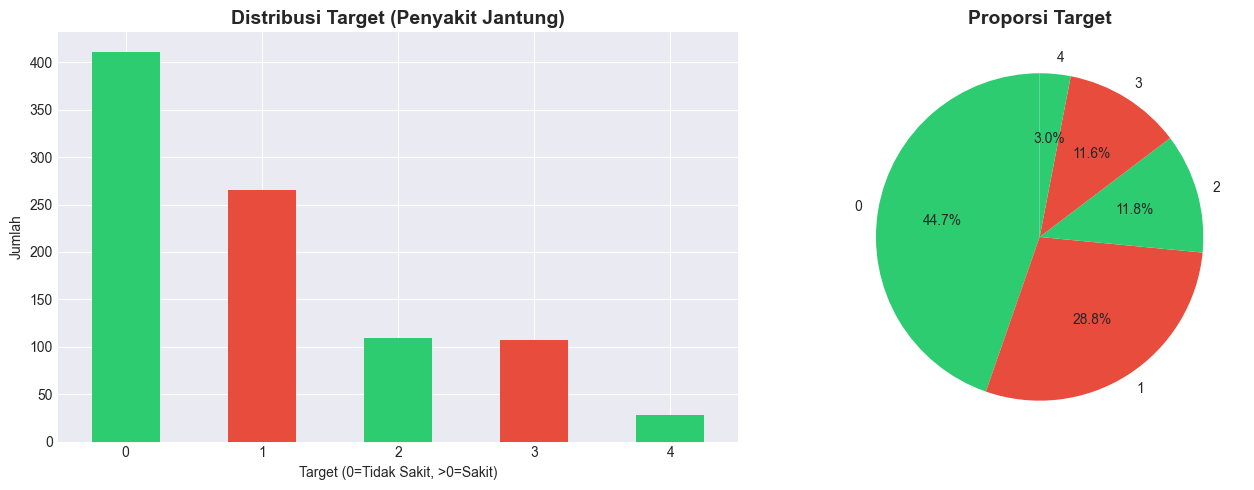

In [47]:
print("\n" + "=" * 60)
print("MEMBUAT VISUALISASI DATA")
print("=" * 60)

# 6.1 Distribusi Target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['target'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribusi Target (Penyakit Jantung)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target (0=Tidak Sakit, >0=Sakit)')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=0)

df['target'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                  colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proporsi Target', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
viz_path = os.path.join(FOLDERS['visualizations'], 'distribusi_target.png')
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"✓ Grafik distribusi target tersimpan: {viz_path}")
plt.show()

✓ Grafik distribusi usia tersimpan: visualizations\distribusi_usia.png


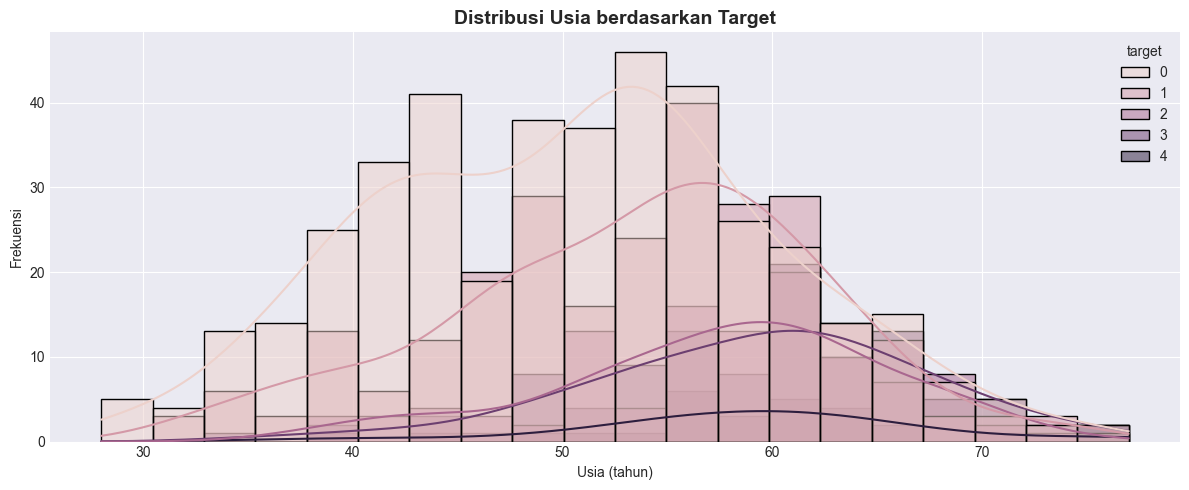

In [48]:
# 6.2 Distribusi Usia
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x='usia', hue='target', kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Usia berdasarkan Target', fontsize=14, fontweight='bold')
ax.set_xlabel('Usia (tahun)')
ax.set_ylabel('Frekuensi')
plt.tight_layout()
viz_path = os.path.join(FOLDERS['visualizations'], 'distribusi_usia.png')
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"✓ Grafik distribusi usia tersimpan: {viz_path}")
plt.show()

✓ Heatmap korelasi tersimpan: visualizations\heatmap_korelasi.png


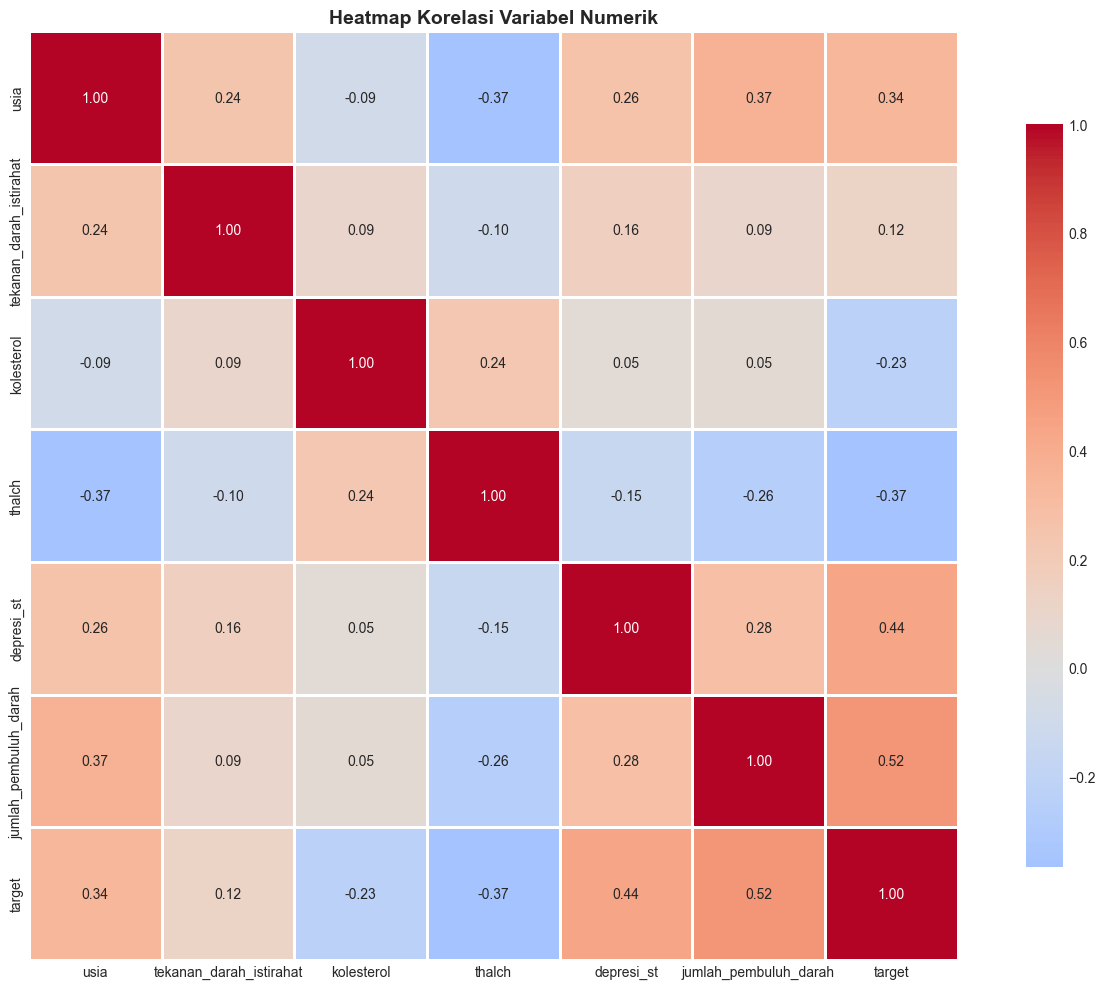

In [49]:
# 6.3 Heatmap Korelasi
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, ax=ax, cbar_kws={"shrink": 0.8})
ax.set_title('Heatmap Korelasi Variabel Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
viz_path = os.path.join(FOLDERS['visualizations'], 'heatmap_korelasi.png')
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"✓ Heatmap korelasi tersimpan: {viz_path}")
plt.show()

✓ Boxplot features tersimpan: visualizations\boxplot_features.png


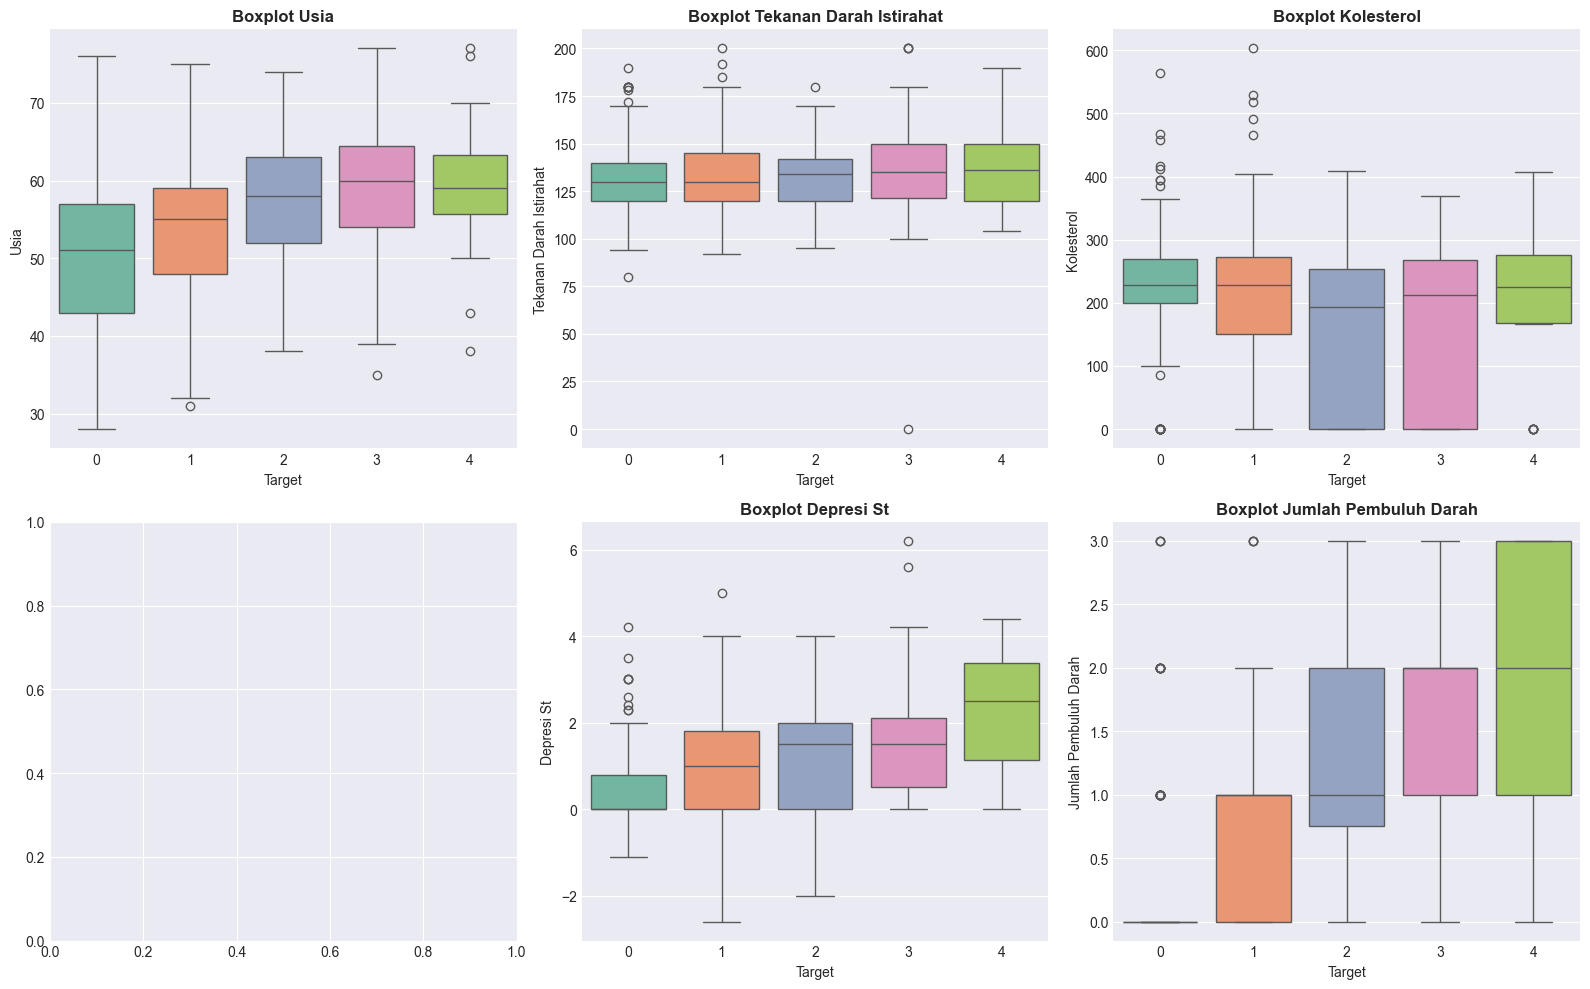

In [50]:
# 6.4 Boxplot untuk Outlier Detection
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

numerical_features = [
    'usia', 
    'tekanan_darah_istirahat', 
    'kolesterol',
    'detak_jantung_maksimal', 
    'depresi_st', 
    'jumlah_pembuluh_darah'
]

for idx, col in enumerate(numerical_features):
    if col in df.columns:
        # Cara baru yang direkomendasikan Seaborn (tanpa warning)
        sns.boxplot(
            data=df, 
            x='target', 
            y=col, 
            hue='target',        
            palette='Set2', 
            legend=False,        
            ax=axes[idx]
        )
        axes[idx].set_title(f'Boxplot {col.replace("_", " ").title()}', fontweight='bold')
        axes[idx].set_xlabel('Target')
        axes[idx].set_ylabel(col.replace('_', ' ').title())

# Sembunyikan subplot yang tidak terpakai (jika ada)
for idx in range(len(numerical_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()

# Simpan gambar
viz_path = os.path.join(FOLDERS['visualizations'], 'boxplot_features.png')
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"✓ Boxplot features tersimpan: {viz_path}")
plt.show()

✓ Countplot variabel kategorikal tersimpan: visualizations\countplot_categorical.png


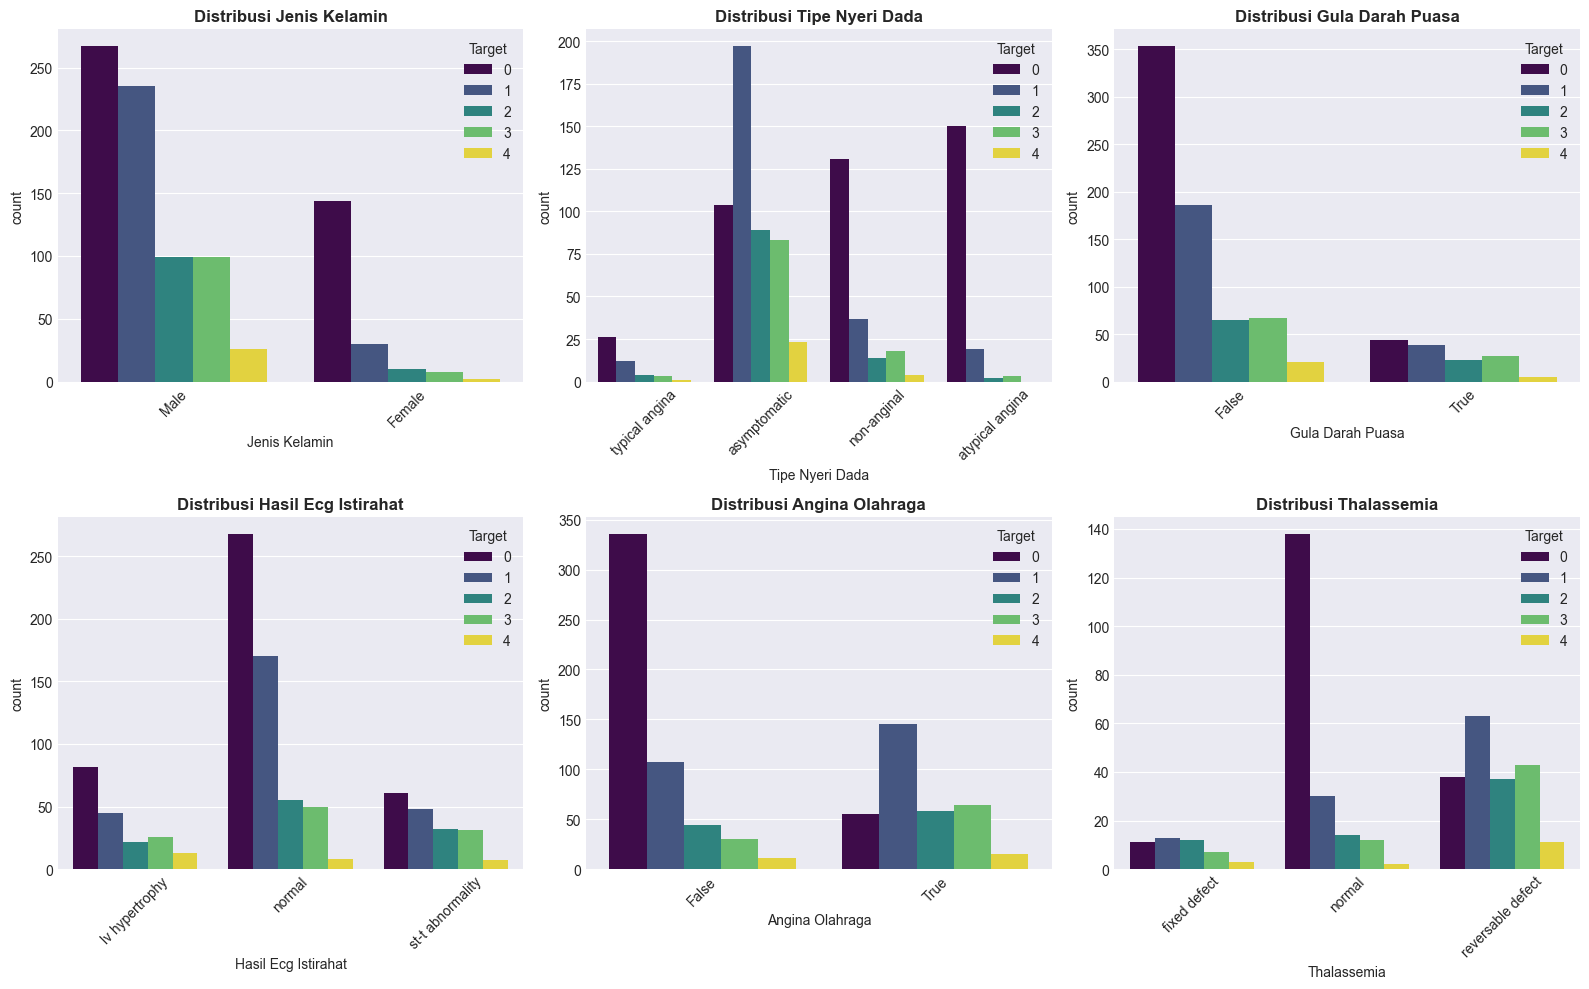

In [51]:
# 6.5 Countplot Variabel Kategorikal
categorical_features = ['jenis_kelamin', 'tipe_nyeri_dada', 'gula_darah_puasa',
                        'hasil_ecg_istirahat', 'angina_olahraga', 'thalassemia']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    if col in df.columns:
        sns.countplot(data=df, x=col, hue='target', ax=axes[idx], palette='viridis')
        axes[idx].set_title(f'Distribusi {col.replace("_", " ").title()}', fontweight='bold')
        axes[idx].set_xlabel(col.replace("_", " ").title())
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].legend(title='Target', loc='upper right')

plt.tight_layout()
viz_path = os.path.join(FOLDERS['visualizations'], 'countplot_categorical.png')
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"✓ Countplot variabel kategorikal tersimpan: {viz_path}")
plt.show()

# **5. Data Preprocessing**

In [52]:
print("\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

df_processed = df.copy()

# 7.1 Handling Missing Values (jika ada)
print("\n--- HANDLING MISSING VALUES ---")

if df_processed.isnull().sum().sum() > 0:
    import pandas as pd
    pd.set_option('future.no_silent_downcasting', True)

    # --- Numerik: isi dengan median ---
    numeric_cols = df_processed.select_dtypes(include='number').columns
    median_values = df_processed[numeric_cols].median()
    df_processed[numeric_cols] = df_processed[numeric_cols].fillna(median_values)
    
    # Log per kolom yang diisi
    filled_numeric = numeric_cols[df_processed[numeric_cols].isnull().sum() > 0]
    for col in filled_numeric:
        print(f"✓ {col}: Missing values diisi dengan median ({median_values[col]})")

    # --- Kategorikal: isi dengan modus ---
    categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df_processed[col].isnull().any():
            mode_val = df_processed[col].mode()[0]  # mode() selalu mengembalikan Series
            df_processed[col] = df_processed[col].fillna(mode_val)
            print(f"✓ {col}: Missing values diisi dengan modus ('{mode_val}')")

else:
    print("✓ Tidak ada missing values yang perlu ditangani")


DATA PREPROCESSING

--- HANDLING MISSING VALUES ---
✓ gula_darah_puasa: Missing values diisi dengan modus ('False')
✓ hasil_ecg_istirahat: Missing values diisi dengan modus ('normal')
✓ angina_olahraga: Missing values diisi dengan modus ('False')
✓ kemiringan_st: Missing values diisi dengan modus ('flat')
✓ thalassemia: Missing values diisi dengan modus ('normal')


In [53]:
# 7.2 Menghapus Duplikasi
print("\n--- MENGHAPUS DUPLIKASI ---")
if df_processed.duplicated().sum() > 0:
    df_processed.drop_duplicates(inplace=True)
    print(f"✓ {duplicates} data duplikat telah dihapus")
else:
    print("✓ Tidak ada data duplikat")


--- MENGHAPUS DUPLIKASI ---
✓ Tidak ada data duplikat


In [54]:

# 7.3 Handling Outliers (metode IQR)
print("\n--- HANDLING OUTLIERS (METODE IQR) ---")

def remove_outliers_iqr(df, column):
    """Menghapus outliers menggunakan metode IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outliers_count

# Kolom yang akan diperiksa outlier
outlier_cols = ['tekanan_darah_istirahat', 'kolesterol', 'detak_jantung_maksimal', 'depresi_st']

original_size = len(df_processed)
for col in outlier_cols:
    if col in df_processed.columns:
        df_processed, outliers = remove_outliers_iqr(df_processed, col)
        if outliers > 0:
            print(f"✓ {col}: {outliers} outliers terdeteksi dan dihapus")

print(f"✓ Total data setelah handling outliers: {len(df_processed)} (dari {original_size})")


--- HANDLING OUTLIERS (METODE IQR) ---
✓ tekanan_darah_istirahat: 28 outliers terdeteksi dan dihapus
✓ kolesterol: 177 outliers terdeteksi dan dihapus
✓ depresi_st: 12 outliers terdeteksi dan dihapus
✓ Total data setelah handling outliers: 703 (dari 920)


In [55]:
# 7.4 Encoding Variabel Kategorikal
print("\n--- ENCODING VARIABEL KATEGORIKAL ---")

# Label Encoding untuk variabel ordinal
label_encoders = {}
ordinal_cols = ['tipe_nyeri_dada', 'hasil_ecg_istirahat', 'kemiringan_st', 'thalassemia']

for col in ordinal_cols:
    if col in df_processed.columns and df_processed[col].dtype == 'object':
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col}: Label encoded")

# Binary encoding untuk jenis kelamin
if 'jenis_kelamin' in df_processed.columns:
    df_processed['jenis_kelamin'] = df_processed['jenis_kelamin'].map({
        'Male': 1, 'M': 1, 'male': 1,
        'Female': 0, 'F': 0, 'female': 0
    })
    print("✓ jenis_kelamin: Binary encoded (Male=1, Female=0)")

# Binary encoding untuk boolean columns
boolean_cols = ['gula_darah_puasa', 'angina_olahraga']
for col in boolean_cols:
    if col in df_processed.columns:
        if df_processed[col].dtype == 'object' or df_processed[col].dtype == 'bool':
            df_processed[col] = df_processed[col].astype(str).map({
                'True': 1, 'true': 1, '1': 1, 'Yes': 1, 'yes': 1,
                'False': 0, 'false': 0, '0': 0, 'No': 0, 'no': 0
            })
            print(f"✓ {col}: Binary encoded")


--- ENCODING VARIABEL KATEGORIKAL ---
✓ tipe_nyeri_dada: Label encoded
✓ hasil_ecg_istirahat: Label encoded
✓ kemiringan_st: Label encoded
✓ thalassemia: Label encoded
✓ jenis_kelamin: Binary encoded (Male=1, Female=0)
✓ gula_darah_puasa: Binary encoded
✓ angina_olahraga: Binary encoded


In [56]:
# 7.5 Konversi Target ke Binary (0: Tidak Sakit, 1: Sakit)
print("\n--- KONVERSI TARGET ---")
df_processed['target'] = (df_processed['target'] > 0).astype(int)
print("✓ Target dikonversi ke binary (0=Tidak Sakit, 1=Sakit)")
print(f"  Distribusi: {df_processed['target'].value_counts().to_dict()}")


--- KONVERSI TARGET ---
✓ Target dikonversi ke binary (0=Tidak Sakit, 1=Sakit)
  Distribusi: {0: 378, 1: 325}


In [57]:
# 7.6 Feature Scaling (Normalisasi)
print("\n--- FEATURE SCALING ---")

# Pisahkan fitur dan target
X = df_processed.drop(['target'], axis=1)
if 'id_pasien' in X.columns:
    X = X.drop(['id_pasien'], axis=1)
y = df_processed['target']

# Identifikasi kolom numerik untuk scaling
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Standardisasi fitur numerik
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

print(f"✓ {len(numeric_features)} fitur numerik telah di-standardisasi")
print(f"  Fitur: {numeric_features}")



--- FEATURE SCALING ---
✓ 13 fitur numerik telah di-standardisasi
  Fitur: ['usia', 'jenis_kelamin', 'tipe_nyeri_dada', 'tekanan_darah_istirahat', 'kolesterol', 'gula_darah_puasa', 'hasil_ecg_istirahat', 'thalch', 'angina_olahraga', 'depresi_st', 'kemiringan_st', 'jumlah_pembuluh_darah', 'thalassemia']


In [58]:
# 7.7 Split Data (Train-Test)
print("\n--- SPLIT DATA (TRAIN-TEST) ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Data train: {X_train.shape[0]} samples")
print(f"✓ Data test: {X_test.shape[0]} samples")
print(f"✓ Jumlah fitur: {X_train.shape[1]}")
print(f"\n  Distribusi target di data train:")
print(f"  {y_train.value_counts().to_dict()}")
print(f"\n  Distribusi target di data test:")
print(f"  {y_test.value_counts().to_dict()}")


--- SPLIT DATA (TRAIN-TEST) ---
✓ Data train: 562 samples
✓ Data test: 141 samples
✓ Jumlah fitur: 13

  Distribusi target di data train:
  {0: 302, 1: 260}

  Distribusi target di data test:
  {0: 76, 1: 65}


In [59]:
print("\n" + "=" * 60)
print("RINGKASAN HASIL PREPROCESSING")
print("=" * 60)
print(f"✓ Dataset awal: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"✓ Dataset setelah preprocessing: {df_processed.shape[0]} baris, {df_processed.shape[1]} kolom")
print(f"✓ Missing values: Ditangani")
print(f"✓ Duplikasi: Dihapus")
print(f"✓ Outliers: Dihapus dengan metode IQR")
print(f"✓ Encoding: Label encoding dan binary encoding")
print(f"✓ Scaling: StandardScaler")
print(f"✓ Split ratio: 80% train, 20% test")

# Simpan data yang sudah dipreprocessing
csv_path = os.path.join(FOLDERS['csv_output'], 'heart_disease_processed.csv')
df_processed.to_csv(csv_path, index=False)
print(f"\n✓ Data yang sudah dipreprocessing disimpan: {csv_path}")

# Simpan data train dan test
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_csv_path = os.path.join(FOLDERS['csv_output'], 'heart_disease_train.csv')
test_csv_path = os.path.join(FOLDERS['csv_output'], 'heart_disease_test.csv')

train_data.to_csv(train_csv_path, index=False)
test_data.to_csv(test_csv_path, index=False)
print(f"✓ Data train disimpan: {train_csv_path}")
print(f"✓ Data test disimpan: {test_csv_path}")


RINGKASAN HASIL PREPROCESSING
✓ Dataset awal: 920 baris, 15 kolom
✓ Dataset setelah preprocessing: 703 baris, 15 kolom
✓ Missing values: Ditangani
✓ Duplikasi: Dihapus
✓ Outliers: Dihapus dengan metode IQR
✓ Encoding: Label encoding dan binary encoding
✓ Scaling: StandardScaler
✓ Split ratio: 80% train, 20% test

✓ Data yang sudah dipreprocessing disimpan: csv_output\heart_disease_processed.csv
✓ Data train disimpan: csv_output\heart_disease_train.csv
✓ Data test disimpan: csv_output\heart_disease_test.csv


In [60]:
print("\n" + "=" * 60)
print("MENYIMPAN DATA PREPROCESSING (NPY & PKL)")
print("=" * 60)

# Simpan dalam format NPY (NumPy array)
np.save(os.path.join(FOLDERS['data'], 'X_train.npy'), X_train.values)
np.save(os.path.join(FOLDERS['data'], 'X_test.npy'), X_test.values)
np.save(os.path.join(FOLDERS['data'], 'y_train.npy'), y_train.values)
np.save(os.path.join(FOLDERS['data'], 'y_test.npy'), y_test.values)
print("✓ Data train/test disimpan dalam format NPY:")
print(f"  - {FOLDERS['data']}/X_train.npy")
print(f"  - {FOLDERS['data']}/X_test.npy")
print(f"  - {FOLDERS['data']}/y_train.npy")
print(f"  - {FOLDERS['data']}/y_test.npy")


MENYIMPAN DATA PREPROCESSING (NPY & PKL)
✓ Data train/test disimpan dalam format NPY:
  - data/X_train.npy
  - data/X_test.npy
  - data/y_train.npy
  - data/y_test.npy


In [61]:
# Simpan dalam format PKL (Pickle)
preprocessing_objects = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': X_train.columns.tolist(),
    'original_columns': df.columns.tolist(),
    'processed_columns': df_processed.columns.tolist()
}

pkl_path = os.path.join(FOLDERS['data'], 'preprocessing_objects.pkl')
with open(pkl_path, 'wb') as f:
    pickle.dump(preprocessing_objects, f)
print(f"\n✓ Semua objek preprocessing disimpan: {pkl_path}")
print("  Isi file PKL:")
print("  - X_train, X_test, y_train, y_test")
print("  - scaler (StandardScaler)")
print("  - label_encoders (dictionary)")
print("  - feature_names (list nama fitur)")
print("  - original_columns & processed_columns")


✓ Semua objek preprocessing disimpan: data\preprocessing_objects.pkl
  Isi file PKL:
  - X_train, X_test, y_train, y_test
  - scaler (StandardScaler)
  - label_encoders (dictionary)
  - feature_names (list nama fitur)
  - original_columns & processed_columns


In [62]:
# Simpan scaler secara terpisah
scaler_path = os.path.join(FOLDERS['data'], 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"\n✓ Scaler disimpan terpisah: {scaler_path}")


✓ Scaler disimpan terpisah: data\scaler.pkl
